Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/500 [00:00<?, ?it/s]

Start of training on 15.05.2021 , 18:26:39


  0%|          | 1/500 [00:00<00:50,  9.95it/s]

epoch : 1 of 15 , learning rate: 0.01 , runtime: 51.28 seconds
training loss: 0.0190, acc 0.2821 
validation loss: 0.0153, validation acc 0.4204 


  0%|          | 1/500 [00:00<00:50,  9.89it/s]

epoch : 2 of 15 , learning rate: 0.01 , runtime: 51.39 seconds
training loss: 0.0137, acc 0.4963 
validation loss: 0.0111, validation acc 0.5967 


  0%|          | 0/500 [00:00<?, ?it/s]

epoch : 3 of 15 , learning rate: 0.01 , runtime: 51.68 seconds
training loss: 0.0109, acc 0.6103 
validation loss: 0.0093, validation acc 0.6780 


  0%|          | 0/500 [00:00<?, ?it/s]

epoch : 4 of 15 , learning rate: 0.01 , runtime: 52.0 seconds
training loss: 0.0094, acc 0.6725 
validation loss: 0.0078, validation acc 0.7354 


  0%|          | 1/500 [00:00<00:51,  9.68it/s]

epoch : 5 of 15 , learning rate: 0.01 , runtime: 51.78 seconds
training loss: 0.0083, acc 0.7130 
validation loss: 0.0070, validation acc 0.7617 


  0%|          | 1/500 [00:00<00:51,  9.74it/s]

epoch : 6 of 15 , learning rate: 0.01 , runtime: 52.45 seconds
training loss: 0.0076, acc 0.7428 
validation loss: 0.0066, validation acc 0.7808 


  0%|          | 1/500 [00:00<00:49, 10.00it/s]

epoch : 7 of 15 , learning rate: 0.01 , runtime: 52.54 seconds
training loss: 0.0069, acc 0.7652 
validation loss: 0.0060, validation acc 0.7991 


  0%|          | 1/500 [00:00<00:50,  9.82it/s]

epoch : 8 of 15 , learning rate: 0.001 , runtime: 51.7 seconds
training loss: 0.0053, acc 0.8170 
validation loss: 0.0049, validation acc 0.8363 


  0%|          | 1/500 [00:00<00:55,  9.05it/s]

epoch : 9 of 15 , learning rate: 0.001 , runtime: 51.71 seconds
training loss: 0.0049, acc 0.8332 
validation loss: 0.0047, validation acc 0.8402 


  0%|          | 0/500 [00:00<?, ?it/s]

epoch : 10 of 15 , learning rate: 0.001 , runtime: 52.64 seconds
training loss: 0.0047, acc 0.8393 
validation loss: 0.0046, validation acc 0.8440 


  0%|          | 1/500 [00:00<00:51,  9.72it/s]

epoch : 11 of 15 , learning rate: 0.001 , runtime: 52.51 seconds
training loss: 0.0046, acc 0.8433 
validation loss: 0.0045, validation acc 0.8447 


  0%|          | 0/500 [00:00<?, ?it/s]

epoch : 12 of 15 , learning rate: 0.0001 , runtime: 52.55 seconds
training loss: 0.0043, acc 0.8528 
validation loss: 0.0044, validation acc 0.8485 


  0%|          | 1/500 [00:00<00:52,  9.45it/s]

epoch : 13 of 15 , learning rate: 0.0001 , runtime: 52.11 seconds
training loss: 0.0042, acc 0.8553 
validation loss: 0.0044, validation acc 0.8503 


  0%|          | 2/500 [00:00<00:48, 10.29it/s]

epoch : 14 of 15 , learning rate: 0.0001 , runtime: 52.51 seconds
training loss: 0.0042, acc 0.8557 
validation loss: 0.0044, validation acc 0.8502 


100%|██████████| 500/500 [00:49<00:00, 10.07it/s]


epoch : 15 of 15 , learning rate: 0.0001 , runtime: 52.35 seconds
training loss: 0.0042, acc 0.8562 
validation loss: 0.0044, validation acc 0.8512 
End of training on 15.05.2021 , 18:39:41


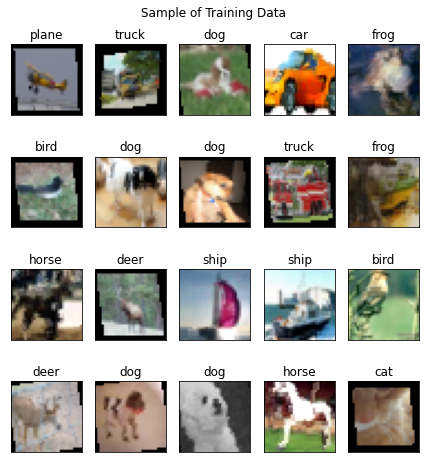

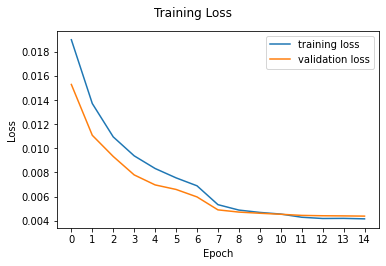

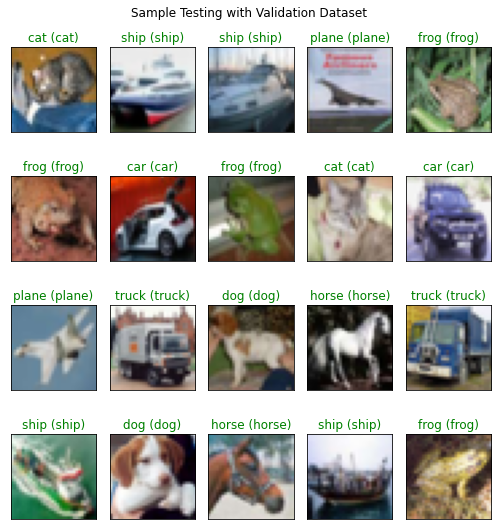

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from datetime import datetime
from datetime import date
import time

# Define Model
cfg = {
    'VGG19': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M'],
}

class VGG(nn.Module):
    def __init__(self, vgg_name, in_channels):
        super(VGG, self).__init__()
        self.features = self._make_layers(cfg[vgg_name],in_channels)
        self.classifier = nn.Linear(512, 10)

    def forward(self, x):
        out = self.features(x)
        out = out.view(out.size(0), -1)
        out = self.classifier(out)
        return out

    def _make_layers(self, cfg, in_channels):
        layers = []
        in_channels = in_channels
        for x in cfg:
            if x == 'M':
                layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
            else:
                layers += [nn.Conv2d(in_channels, x, kernel_size=3, padding=1),
                           nn.BatchNorm2d(x),
                           nn.ReLU(inplace=True)]
                in_channels = x
        layers += [nn.AvgPool2d(kernel_size=1, stride=1)]
        return nn.Sequential(*layers)


def im_convert(tensor):
  image = tensor.cpu().clone().detach().numpy()
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
  image = image.clip(0, 1)
  return image

def detach(tensor):
  tensor.cpu().clone().detach()

if __name__ == '__main__':
# Load CIFAR-10 Dataset
  resize=(32,32)
  transform_train = transforms.Compose([transforms.Resize((resize)),
                                        transforms.RandomHorizontalFlip(),
                                        transforms.RandomRotation(10),
                                        transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
                                        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
                                        transforms.ToTensor(),
                                        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                ])
  transform = transforms.Compose([transforms.Resize((resize)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                ])
  training_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
  validation_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

  training_loader = torch.utils.data.DataLoader(training_dataset, batch_size=100, shuffle=True)
  validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size = 100, shuffle=False)  

# CIFAR-10 classes
  classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

 # Displaying images from training data  
  dataiter = iter(training_loader)
  images, labels = dataiter.next()
  fig = plt.figure(figsize=(6,7))
  for idx in np.arange(20):
    ax = fig.add_subplot(4, 5, idx+1, xticks=[], yticks=[])
    plt.imshow(im_convert(images[idx]))
    ax.set_title(classes[labels[idx].item()])
    plt.suptitle("Sample of Training Data")
    plt.tight_layout(1.0)


# Training parameters
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  model = VGG("VGG19",in_channels=3).to(device)

  print_lr = 0.01
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr = print_lr,momentum=0.9, weight_decay=5e-4)

  epochs = 15
  running_loss_history = []
  running_corrects_history = []
  val_running_loss_history = []
  val_running_corrects_history = []

# Training Loop
  print("Start of training on", date.today().strftime("%d.%m.%Y"),",",datetime.now().strftime("%H:%M:%S"))
  for e in range(epochs):
    # if e>0 and (e<(epochs-1)) and (e%7==0):  
    if e in [7,11]:
      for param_group in optimizer.param_groups:
        param_group['lr'] *= 0.1
        print_lr = param_group['lr']

    running_loss = 0.0
    running_corrects = 0.0
    val_running_loss = 0.0
    val_running_corrects = 0.0

    epoch_start_time = time.time()
    
    for inputs, labels in tqdm(training_loader):
      inputs = inputs.to(device)
      labels = labels.to(device)
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      
      _, preds = torch.max(outputs, 1)
      running_loss += loss.item()
      running_corrects += torch.sum(preds == labels.data)

    else:
      with torch.no_grad():
        for val_inputs, val_labels in validation_loader:
          val_inputs = val_inputs.to(device)
          val_labels = val_labels.to(device)
          val_outputs = model(val_inputs)
          val_loss = criterion(val_outputs, val_labels)
          
          _, val_preds = torch.max(val_outputs, 1)
          val_running_loss += val_loss.item()
          val_running_corrects += torch.sum(val_preds == val_labels.data)

      detach(inputs)
      detach(labels)
      detach(val_inputs)
      detach(val_labels)
      del inputs
      del labels
      del val_inputs
      del val_labels    
      torch.cuda.empty_cache()  

      epoch_run_time = round(time.time() - epoch_start_time,2)
      epoch_loss = running_loss/len(training_loader.dataset)
      epoch_acc = running_corrects.float()/ len(training_loader.dataset)
      running_loss_history.append(epoch_loss)
      running_corrects_history.append(epoch_acc)
      
      val_epoch_loss = val_running_loss/len(validation_loader.dataset)
      val_epoch_acc = val_running_corrects.float()/ len(validation_loader.dataset)
      val_running_loss_history.append(val_epoch_loss)
      val_running_corrects_history.append(val_epoch_acc)
      print('epoch :', (e+1),"of",epochs,", learning rate:",print_lr,", runtime:",epoch_run_time,"seconds")
      print('training loss: {:.4f}, acc {:.4f} '.format(epoch_loss, epoch_acc.item()))
      print('validation loss: {:.4f}, validation acc {:.4f} '.format(val_epoch_loss, val_epoch_acc.item()))
  print("End of training on", date.today().strftime("%d.%m.%Y"),",",datetime.now().strftime("%H:%M:%S"))    

# Plot training loss 
  plt.figure()
  plt.plot(running_loss_history, label='training loss')
  plt.plot(val_running_loss_history, label='validation loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.tight_layout(3.0)
  plt.xticks(ticks=list(range(epochs))) 
  plt.legend()
  plt.suptitle("Training Loss")

# Validation: Show output of trained model
  dataiter = iter(validation_loader)
  images, labels = dataiter.next()
  images = images.to(device)
  labels = labels.to(device)
  output = model(images)
  _, preds = torch.max(output, 1)

  fig = plt.figure(figsize=(7,8))
  for idx in np.arange(20):
    ax = fig.add_subplot(4,5, idx+1, xticks=[], yticks=[])
    plt.imshow(im_convert(images[idx]))
    plt.suptitle("Sample Testing with Validation Dataset")
    plt.tight_layout(1.0)
    ax.set_title("{} ({})".format(str(classes[preds[idx].item()]), str(classes[labels[idx].item()])), color=("green" if preds[idx]==labels[idx] else "red"))

  model.to('cpu')
  detach(images)
  detach(labels)
  del images
  del labels 

In [3]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256